In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns

In [3]:
train_0D = pd.read_csv('train_0D_index.csv')

In [4]:
train_0D.head()

row_index  V_in  Measured_RPM  Vibration_1  Vibration_2  Vibration_3
0          1   0.0     28.610235          0.0          0.0          0.0
1          2   0.0     28.610235          0.0          0.0          0.0
2          3   0.0     28.610235          0.0          0.0          0.0
3          4   0.0     28.610235          0.0          0.0          0.0
4          5   0.0     28.610235          0.0          0.0          0.0

In [4]:
# According to the research paper, there is 6,438 x 1 second windows, where each second have 4096 readings.
# Total readings should be 6438 x 4096 = 26,370,048

train_0D.shape

# Dataset has 26,423,295 hence, there is a difference of 26,423,295 - 26,370,048 = 53,247
# Hence, we can drop the first 53,247

(26423295, 6)

# 1.1 Exploring the dataset

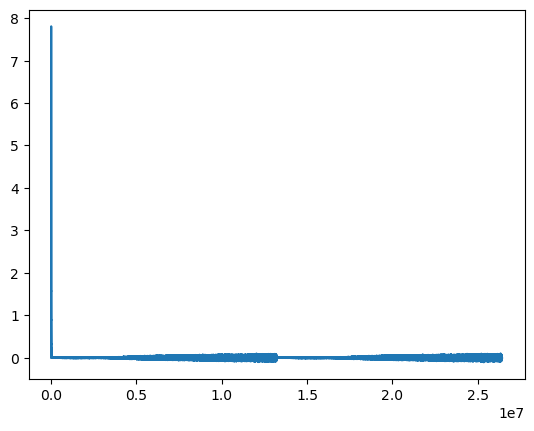

In [5]:
plt.plot(train_0D['row_index'],train_0D['Vibration_1'])
plt.show()

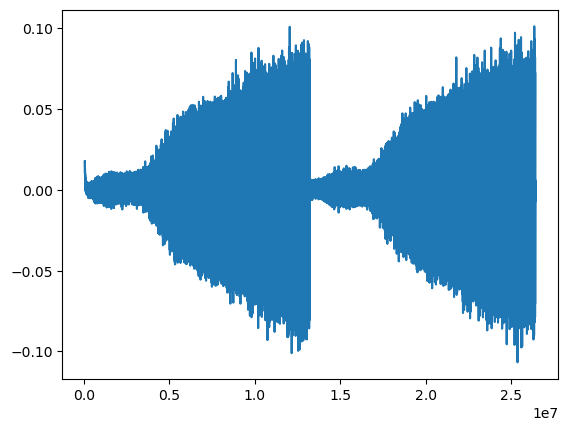

In [6]:
# Remove the first 53247 rows as the data show irregularities in the data

plt.plot(train_0D.iloc[53247:]['row_index'],train_0D.iloc[53247:]['Vibration_1'])
plt.show()

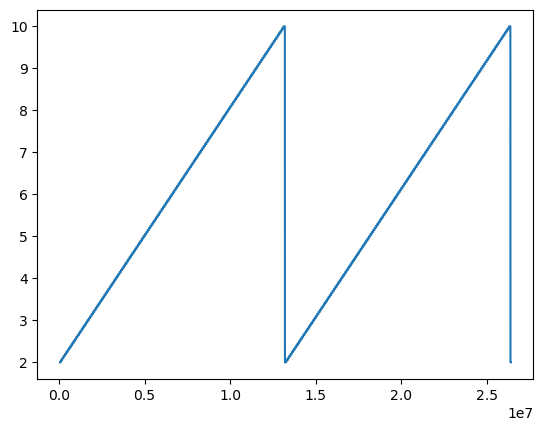

In [8]:
plt.plot(train_0D.iloc[53247:]['row_index'],train_0D.iloc[53247:]['V_in'])
plt.show()

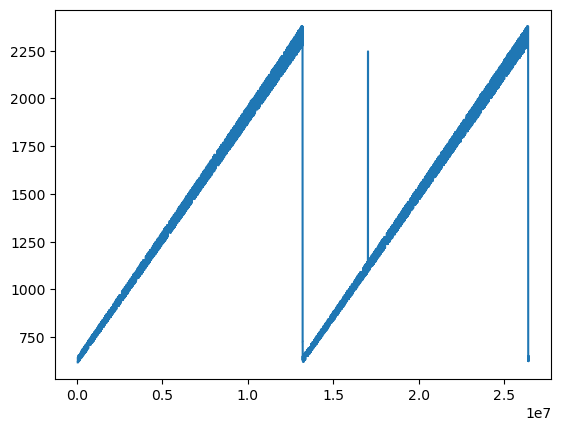

In [9]:
plt.plot(train_0D.iloc[53247:]['row_index'],train_0D.iloc[53247:]['Measured_RPM'])
plt.show()

#### An irregularity is spotted where there is a spike in the measured RPM, which can be removed as the V_in should correlate directly with the RPM, i.e. higher V_in = higher RPM

#### According to the paper, there the voltage is held for 20 seconds before the reading is increased by 0.05, hence, checking below on the data

In [10]:
train_0D_cut = train_0D.iloc[53247:]

In [11]:
pivot = train_0D_cut.groupby('V_in').size().reset_index(name='Count')
pivot

V_in   Count
0     2.00  155648
1     2.05  163840
2     2.10  163840
3     2.15  163840
4     2.20  163840
5     2.25  163840
6     2.30  163840
7     2.35  163840
8     2.40  163840
9     2.45  163840
10    2.50  163840
11    2.55  163840
12    2.60  163840
13    2.65  163840
14    2.70  163840
15    2.75  163840
16    2.80  163840
17    2.85  163840
18    2.90  163840
19    2.95  163840
20    3.00  163840
21    3.05  163840
22    3.10  163840
23    3.15  163840
24    3.20  163840
25    3.25  163840
26    3.30  163840
27    3.35  163840
28    3.40  163840
29    3.45  163840
30    3.50  163840
31    3.55  163840
32    3.60  163840
33    3.65  163840
34    3.70  163840
35    3.75  163840
36    3.80  163840
37    3.85  163840
38    3.90  163840
39    3.95  163840
40    4.00  163840
41    4.05  163840
42    4.10  163840
43    4.15  163840
44    4.20  163840
45    4.25  163840
46    4.30  163840
47    4.35  163840
48    4.40  163840
49    4.45  163840
50    4.50  163840
51    4.55  163840
52    4.60  163840
53    4.65  163840
54    4.70  163840
55    4.75  163840
56    4.80  163840
57    4.85  163840
58    4.90  163840
59    4.95  163840
60    5.00  163840
61    5.05  163840
62    5.10  163840
63    5.15  163840
64    5.20  163840
65    5.25  163840
66    5.30  163840
67    5.35  163840
68    5.40  163840
69    5.45  163840
70    5.50  163840
71    5.55  163840
72    5.60  163840
73    5.65  163840
74    5.70  163840
75    5.75  163840
76    5.80  163840
77    5.85  163840
78    5.90  163840
79    5.95  163840
80    6.00  163840
81    6.05  163840
82    6.10  163840
83    6.15  163840
84    6.20  163840
85    6.25  163840
86    6.30  163840
87    6.35  163840
88    6.40  163840
89    6.45  163840
90    6.50  163840
91    6.55  163840
92    6.60  163840
93    6.65  163840
94    6.70  163840
95    6.75  163840
96    6.80  163840
97    6.85  163840
98    6.90  163840
99    6.95  163840
100   7.00  163840
101   7.05  163840
102   7.10  163840
103   7.15  163840
104   7.20  163840
105   7.25  163840
106   7.30  163840
107   7.35  163840
108   7.40  163840
109   7.45  163840
110   7.50  163840
111   7.55  163840
112   7.60  163840
113   7.65  163840
114   7.70  163840
115   7.75  163840
116   7.80  163840
117   7.85  163840
118   7.90  163840
119   7.95  163840
120   8.00  163840
121   8.05  163840
122   8.10  163840
123   8.15  163840
124   8.20  163840
125   8.25  163840
126   8.30  163840
127   8.35  163840
128   8.40  163840
129   8.45  163840
130   8.50  163840
131   8.55  163840
132   8.60  163840
133   8.65  163840
134   8.70  163840
135   8.75  163840
136   8.80  163840
137   8.85  163840
138   8.90  163840
139   8.95  163840
140   9.00  163840
141   9.05  163840
142   9.10  163840
143   9.15  163840
144   9.20  163840
145   9.25  163840
146   9.30  163840
147   9.35  163840
148   9.40  163840
149   9.45  163840
150   9.50  163840
151   9.55  163840
152   9.60  163840
153   9.65  163840
154   9.70  163840
155   9.75  163840
156   9.80  163840
157   9.85  163840
158   9.90  163840
159   9.95  163840
160  10.00  163840

#### Based on the /above, we can see that each V_in have about 163,840/4,096 or about 40 seconds of data, 2.0 V_in have 155,648/4,096 = 38 seconds. Since there were 2 run-ups, each run up has 20 s for 2.05V to 10.00V, while 2.0V have 19 s each

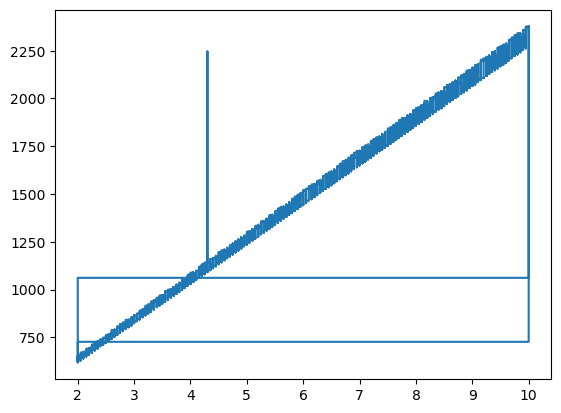

In [12]:
plt.plot(train_0D_cut['V_in'],train_0D_cut['Measured_RPM'])
plt.show()

#### Barring some errorneous values, it seems like the variability of the measured RPM value increases at higher voltages

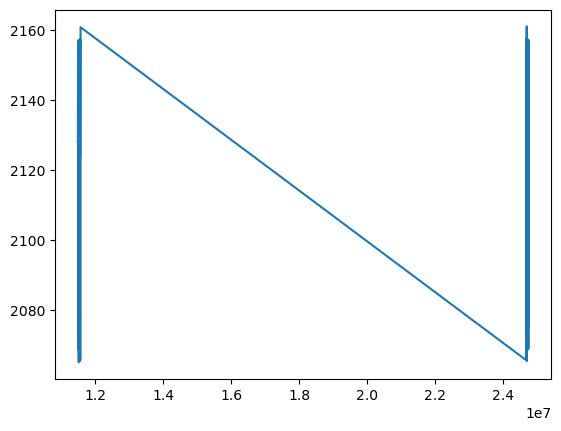

In [13]:
# Taking a sample look at a particular V_in on RPM

plt.plot(train_0D_cut[train_0D_cut['V_in']==9.0]['row_index'],train_0D_cut[train_0D_cut['V_in']==9.0]['Measured_RPM'])
plt.show()

#### It seems like the variability is mainly near the start and end where there is a change in V_in, hence to ensure a clear signal can be obtained, we can exclude the first 5 and last 5 seconds, taking in total 10 seconds of samples

### The idea is to insert the time_index for each voltage. E.g. 2.0_S1 for first 4096, followed by 2.0_S2 for next 4096 etc etc

In [14]:
# Creating indexes to index the data for easier comparison across various datasets for ML
my_list = ['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10','S11','S12'
          ,'S13','S14','S15','S16','S17','S18','S19','S20'] # list of labels where S1 to S20 represent second 1 to second 20

interval = 4096
repeated_string_list = np.repeat(my_list, 4096)
repeated_string_list
# Each entity repeats itself for 4096 times

array(['S1', 'S1', 'S1', ..., 'S20', 'S20', 'S20'], dtype='<U3')

In [15]:
len(repeated_string_list)

81920

In [16]:
# to repeat the above string_list number of times to cover the whole dataset

print(train_0D_cut.shape)

df_interval = train_0D_cut.shape[0]/4096
print(df_interval)

(26370048, 6)
6438.0


In [17]:
# Create the indices
train_0D_cut['Time_Index_Label'] = train_0D_cut.groupby('V_in').cumcount() // 4096 + 1
train_0D_cut['Time_Index_Label'] = train_0D_cut.apply(lambda x: f"{x['V_in']}_{int(x['Time_Index_Label'])}S", axis=1)
train_0D_cut.head()

C:\Users\jerem\AppData\Local\Temp\ipykernel_27684\3524418661.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_0D_cut['Time_Index_Label'] = train_0D_cut.groupby('V_in').cumcount() // 4096 + 1
C:\Users\jerem\AppData\Local\Temp\ipykernel_27684\3524418661.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_0D_cut['Time_Index_Label'] = train_0D_cut.apply(lambda x: f"{x['V_in']}_{int(x['Time_Index_Label'])}S", axis=1)


row_index  V_in  Measured_RPM  Vibration_1  Vibration_2  Vibration_3  \
53247      53248   2.0     618.47863     0.017416     0.027537     0.021683   
53248      53249   2.0     618.47863     0.017314     0.027595     0.022091   
53249      53250   2.0     618.47863     0.016990     0.027399     0.022568   
53250      53251   2.0     618.47863     0.017459     0.027478     0.022106   
53251      53252   2.0     618.47863     0.017045     0.027364     0.022198   

      Time_Index_Label  
53247           2.0_1S  
53248           2.0_1S  
53249           2.0_1S  
53250           2.0_1S  
53251           2.0_1S

In [18]:
# Count number of indices for each V_in
pivot_1 = train_0D_cut.groupby('Time_Index_Label').size().reset_index(name='Count')
pivot_1

Time_Index_Label  Count
0            10.0_10S   4096
1            10.0_11S   4096
2            10.0_12S   4096
3            10.0_13S   4096
4            10.0_14S   4096
5            10.0_15S   4096
6            10.0_16S   4096
7            10.0_17S   4096
8            10.0_18S   4096
9            10.0_19S   4096
10            10.0_1S   4096
11           10.0_20S   4096
12           10.0_21S   4096
13           10.0_22S   4096
14           10.0_23S   4096
15           10.0_24S   4096
16           10.0_25S   4096
17           10.0_26S   4096
18           10.0_27S   4096
19           10.0_28S   4096
20           10.0_29S   4096
21            10.0_2S   4096
22           10.0_30S   4096
23           10.0_31S   4096
24           10.0_32S   4096
25           10.0_33S   4096
26           10.0_34S   4096
27           10.0_35S   4096
28           10.0_36S   4096
29           10.0_37S   4096
30           10.0_38S   4096
31           10.0_39S   4096
32            10.0_3S   4096
33           10.0_40S   4096
34            10.0_4S   4096
35            10.0_5S   4096
36            10.0_6S   4096
37            10.0_7S   4096
38            10.0_8S   4096
39            10.0_9S   4096
40           2.05_10S   4096
41           2.05_11S   4096
42           2.05_12S   4096
43           2.05_13S   4096
44           2.05_14S   4096
45           2.05_15S   4096
46           2.05_16S   4096
47           2.05_17S   4096
48           2.05_18S   4096
49           2.05_19S   4096
50            2.05_1S   4096
51           2.05_20S   4096
52           2.05_21S   4096
53           2.05_22S   4096
54           2.05_23S   4096
55           2.05_24S   4096
56           2.05_25S   4096
57           2.05_26S   4096
58           2.05_27S   4096
59           2.05_28S   4096
60           2.05_29S   4096
61            2.05_2S   4096
62           2.05_30S   4096
63           2.05_31S   4096
64           2.05_32S   4096
65           2.05_33S   4096
66           2.05_34S   4096
67           2.05_35S   4096
68           2.05_36S   4096
69           2.05_37S   4096
70           2.05_38S   4096
71           2.05_39S   4096
72            2.05_3S   4096
73           2.05_40S   4096
74            2.05_4S   4096
75            2.05_5S   4096
76            2.05_6S   4096
77            2.05_7S   4096
78            2.05_8S   4096
79            2.05_9S   4096
80            2.0_10S   4096
81            2.0_11S   4096
82            2.0_12S   4096
83            2.0_13S   4096
84            2.0_14S   4096
85            2.0_15S   4096
86            2.0_16S   4096
87            2.0_17S   4096
88            2.0_18S   4096
89            2.0_19S   4096
90             2.0_1S   4096
91            2.0_20S   4096
92            2.0_21S   4096
93            2.0_22S   4096
94            2.0_23S   4096
95            2.0_24S   4096
96            2.0_25S   4096
97            2.0_26S   4096
98            2.0_27S   4096
99            2.0_28S   4096
100           2.0_29S   4096
101            2.0_2S   4096
102           2.0_30S   4096
103           2.0_31S   4096
104           2.0_32S   4096
105           2.0_33S   4096
106           2.0_34S   4096
107           2.0_35S   4096
108           2.0_36S   4096
109           2.0_37S   4096
110           2.0_38S   4096
111            2.0_3S   4096
112            2.0_4S   4096
113            2.0_5S   4096
114            2.0_6S   4096
115            2.0_7S   4096
116            2.0_8S   4096
117            2.0_9S   4096
118          2.15_10S   4096
119          2.15_11S   4096
120          2.15_12S   4096
121          2.15_13S   4096
122          2.15_14S   4096
123          2.15_15S   4096
124          2.15_16S   4096
125          2.15_17S   4096
126          2.15_18S   4096
127          2.15_19S   4096
128           2.15_1S   4096
129          2.15_20S   4096
130          2.15_21S   4096
131          2.15_22S   4096
132          2.15_23S   4096
133          2.15_24S   4096
134          2.15_25S   4096
135          2.15_26S   4096
136          2.15_27S   4096
137

In [19]:
# Add an average measured RPM value for each index

RPM_Average_train = train_0D_cut.groupby('Time_Index_Label')['Measured_RPM'].mean()
RPM_Average_train

Time_Index_Label
10.0_10S    2273.869617
10.0_11S    2278.057258
10.0_12S    2372.480369
10.0_13S    2376.441987
10.0_14S    2345.673289
10.0_15S    2341.515691
10.0_16S    2274.322091
10.0_17S    2277.993366
10.0_18S    2376.541571
10.0_19S    2367.814998
10.0_1S     2376.496548
10.0_20S    2341.206319
10.0_21S    2372.426090
10.0_22S    2346.177710
10.0_23S    2341.698378
10.0_24S    2274.042007
10.0_25S    2278.187930
10.0_26S    2376.590723
10.0_27S    2376.676234
10.0_28S    2341.189461
10.0_29S    2341.014210
10.0_2S     2376.276260
10.0_30S    2277.990911
10.0_31S    2278.058256
10.0_32S    2376.566070
10.0_33S    2371.933755
10.0_34S    2345.948455
10.0_35S    2341.652658
10.0_36S    2273.911653
10.0_37S    2273.719001
10.0_38S    2278.252711
10.0_39S    2376.167240
10.0_3S     2341.304767
10.0_40S    2376.010871
10.0_4S     2345.656743
10.0_5S     2273.760868
10.0_6S     2273.655793
10.0_7S     2372.307685
10.0_8S     2341.532083
10.0_9S     2341.447097
2.05_10S     628.955849

In [20]:
RPM_Average_train = RPM_Average_train.reset_index()
RPM_Average_train.columns = ['Time_Index_Labels', 'Average_RPM']
RPM_Average_train

Time_Index_Labels  Average_RPM
0             10.0_10S  2273.869617
1             10.0_11S  2278.057258
2             10.0_12S  2372.480369
3             10.0_13S  2376.441987
4             10.0_14S  2345.673289
5             10.0_15S  2341.515691
6             10.0_16S  2274.322091
7             10.0_17S  2277.993366
8             10.0_18S  2376.541571
9             10.0_19S  2367.814998
10             10.0_1S  2376.496548
11            10.0_20S  2341.206319
12            10.0_21S  2372.426090
13            10.0_22S  2346.177710
14            10.0_23S  2341.698378
15            10.0_24S  2274.042007
16            10.0_25S  2278.187930
17            10.0_26S  2376.590723
18            10.0_27S  2376.676234
19            10.0_28S  2341.189461
20            10.0_29S  2341.014210
21             10.0_2S  2376.276260
22            10.0_30S  2277.990911
23            10.0_31S  2278.058256
24            10.0_32S  2376.566070
25            10.0_33S  2371.933755
26            10.0_34S  2345.948455
27            10.0_35S  2341.652658
28            10.0_36S  2273.911653
29            10.0_37S  2273.719001
30            10.0_38S  2278.252711
31            10.0_39S  2376.167240
32             10.0_3S  2341.304767
33            10.0_40S  2376.010871
34             10.0_4S  2345.656743
35             10.0_5S  2273.760868
36             10.0_6S  2273.655793
37             10.0_7S  2372.307685
38             10.0_8S  2341.532083
39             10.0_9S  2341.447097
40            2.05_10S   628.955849
41            2.05_11S   657.043330
42            2.05_12S   651.639266
43            2.05_13S   651.985841
44            2.05_14S   628.940751
45            2.05_15S   655.971088
46            2.05_16S   650.066931
47            2.05_17S   651.661937
48            2.05_18S   628.927865
49            2.05_19S   657.161406
50             2.05_1S   629.234040
51            2.05_20S   656.409341
52            2.05_21S   653.294458
53            2.05_22S   654.593338
54            2.05_23S   633.626729
55            2.05_24S   661.548294
56            2.05_25S   659.107696
57            2.05_26S   654.097286
58            2.05_27S   654.689596
59            2.05_28S   633.053332
60            2.05_29S   633.068477
61             2.05_2S   628.341399
62            2.05_30S   660.898023
63            2.05_31S   651.369585
64            2.05_32S   655.438482
65            2.05_33S   632.638135
66            2.05_34S   633.936009
67            2.05_35S   660.467141
68            2.05_36S   659.037128
69            2.05_37S   654.066950
70            2.05_38S   632.649638
71            2.05_39S   633.262165
72             2.05_3S   655.403684
73            2.05_40S   660.760828
74             2.05_4S   651.361429
75             2.05_5S   629.284142
76             2.05_6S   630.856419
77             2.05_7S   656.364271
78             2.05_8S   651.652879
79             2.05_9S   628.020977
80             2.0_10S   640.360350
81             2.0_11S   726.603832
82             2.0_12S   629.683310
83             2.0_13S   651.365060
84             2.0_14S   645.104100
85             2.0_15S   623.137120
86             2.0_16S   650.994030
87             2.0_17S   644.350690
88             2.0_18S   622.833100
89             2.0_19S   649.693460
90              2.0_1S   618.478630
91             2.0_20S   642.783720
92             2.0_21S   622.116270
93             2.0_22S   649.982030
94             2.0_23S   644.457970
95             2.0_24S   650.639290
96             2.0_25S   644.714190
97             2.0_26S   623.645560
98             2.0_27S   649.997870
99             2.0_28S   640.998290
100            2.0_29S   622.718360
101             2.0_2S   645.043420
102            2.0_30S   648.338540
103            2.0_31S  1061.297865
104            2.0_32S   637.833110
105            2.0_33S   624.588520
106            2.0_34S   651.925940
107            2.0_35S   644.927280
108            2.0_36S   624.543010
109            2.0_37S   650.941060
110      

In [21]:
RPM_Average_train['Rounded_Average_RPM'] = RPM_Average_train['Average_RPM'].round(decimals=-1)
RPM_Average_train

Time_Index_Labels  Average_RPM  Rounded_Average_RPM
0             10.0_10S  2273.869617               2270.0
1             10.0_11S  2278.057258               2280.0
2             10.0_12S  2372.480369               2370.0
3             10.0_13S  2376.441987               2380.0
4             10.0_14S  2345.673289               2350.0
5             10.0_15S  2341.515691               2340.0
6             10.0_16S  2274.322091               2270.0
7             10.0_17S  2277.993366               2280.0
8             10.0_18S  2376.541571               2380.0
9             10.0_19S  2367.814998               2370.0
10             10.0_1S  2376.496548               2380.0
11            10.0_20S  2341.206319               2340.0
12            10.0_21S  2372.426090               2370.0
13            10.0_22S  2346.177710               2350.0
14            10.0_23S  2341.698378               2340.0
15            10.0_24S  2274.042007               2270.0
16            10.0_25S  2278.187930               2280.0
17            10.0_26S  2376.590723               2380.0
18            10.0_27S  2376.676234               2380.0
19            10.0_28S  2341.189461               2340.0
20            10.0_29S  2341.014210               2340.0
21             10.0_2S  2376.276260               2380.0
22            10.0_30S  2277.990911               2280.0
23            10.0_31S  2278.058256               2280.0
24            10.0_32S  2376.566070               2380.0
25            10.0_33S  2371.933755               2370.0
26            10.0_34S  2345.948455               2350.0
27            10.0_35S  2341.652658               2340.0
28            10.0_36S  2273.911653               2270.0
29            10.0_37S  2273.719001               2270.0
30            10.0_38S  2278.252711               2280.0
31            10.0_39S  2376.167240               2380.0
32             10.0_3S  2341.304767               2340.0
33            10.0_40S  2376.010871               2380.0
34             10.0_4S  2345.656743               2350.0
35             10.0_5S  2273.760868               2270.0
36             10.0_6S  2273.655793               2270.0
37             10.0_7S  2372.307685               2370.0
38             10.0_8S  2341.532083               2340.0
39             10.0_9S  2341.447097               2340.0
40            2.05_10S   628.955849                630.0
41            2.05_11S   657.043330                660.0
42            2.05_12S   651.639266                650.0
43            2.05_13S   651.985841                650.0
44            2.05_14S   628.940751                630.0
45            2.05_15S   655.971088                660.0
46            2.05_16S   650.066931                650.0
47            2.05_17S   651.661937                650.0
48            2.05_18S   628.927865                630.0
49            2.05_19S   657.161406                660.0
50             2.05_1S   629.234040                630.0
51            2.05_20S   656.409341                660.0
52            2.05_21S   653.294458                650.0
53            2.05_22S   654.593338                650.0
54            2.05_23S   633.626729                630.0
55            2.05_24S   661.548294                660.0
56            2.05_25S   659.107696                660.0
57            2.05_26S   654.097286                650.0
58            2.05_27S   654.689596                650.0
59            2.05_28S   633.053332                630.0
60            2.05_29S   633.068477                630.0
61             2.05_2S   628.341399                630.0
62            2.05_30S   660.898023                660.0
63            2.05_31S   651.369585                650.0
64            2.05_32S   655.438482                660.0
65            2.05_33S   632.638135                630.0
66            2.05_34S   633.936009                630.0
67            2.05_35S   660.467141                660.0
68            2.05_36S   659.037128                660.0
69            2

In [22]:
# Find the range of rounded_average_RPM

RPM_Average_train.describe()

Average_RPM  Rounded_Average_RPM
count  6438.000000          6438.000000
mean   1482.475348          1482.489904
std     492.937782           493.066953
min     618.478630           620.000000
25%    1053.445793          1050.000000
50%    1485.177506          1490.000000
75%    1906.892085          1910.000000
max    2376.676234          2380.000000

In [23]:
# Create a list of each rounded_average_RPM
RPM_check_train = [i for i in range(620,2390,10)]
RPM_check_train


[620,
 630,
 640,
 650,
 660,
 670,
 680,
 690,
 700,
 710,
 720,
 730,
 740,
 750,
 760,
 770,
 780,
 790,
 800,
 810,
 820,
 830,
 840,
 850,
 860,
 870,
 880,
 890,
 900,
 910,
 920,
 930,
 940,
 950,
 960,
 970,
 980,
 990,
 1000,
 1010,
 1020,
 1030,
 1040,
 1050,
 1060,
 1070,
 1080,
 1090,
 1100,
 1110,
 1120,
 1130,
 1140,
 1150,
 1160,
 1170,
 1180,
 1190,
 1200,
 1210,
 1220,
 1230,
 1240,
 1250,
 1260,
 1270,
 1280,
 1290,
 1300,
 1310,
 1320,
 1330,
 1340,
 1350,
 1360,
 1370,
 1380,
 1390,
 1400,
 1410,
 1420,
 1430,
 1440,
 1450,
 1460,
 1470,
 1480,
 1490,
 1500,
 1510,
 1520,
 1530,
 1540,
 1550,
 1560,
 1570,
 1580,
 1590,
 1600,
 1610,
 1620,
 1630,
 1640,
 1650,
 1660,
 1670,
 1680,
 1690,
 1700,
 1710,
 1720,
 1730,
 1740,
 1750,
 1760,
 1770,
 1780,
 1790,
 1800,
 1810,
 1820,
 1830,
 1840,
 1850,
 1860,
 1870,
 1880,
 1890,
 1900,
 1910,
 1920,
 1930,
 1940,
 1950,
 1960,
 1970,
 1980,
 1990,
 2000,
 2010,
 2020,
 2030,
 2040,
 2050,
 2060,
 2070,
 2080,
 2090,
 2

In [24]:
for rpm in RPM_check_train:
    print(rpm, 'number of indices',len(RPM_Average_train[RPM_Average_train['Rounded_Average_RPM'] == rpm]))

620 number of indices 10
630 number of indices 16
640 number of indices 18
650 number of indices 38
660 number of indices 39
670 number of indices 46
680 number of indices 41
690 number of indices 39
700 number of indices 27
710 number of indices 35
720 number of indices 39
730 number of indices 41
740 number of indices 39
750 number of indices 39
760 number of indices 44
770 number of indices 33
780 number of indices 39
790 number of indices 34
800 number of indices 39
810 number of indices 37
820 number of indices 40
830 number of indices 40
840 number of indices 37
850 number of indices 35
860 number of indices 41
870 number of indices 44
880 number of indices 43
890 number of indices 38
900 number of indices 34
910 number of indices 21
920 number of indices 41
930 number of indices 33
940 number of indices 45
950 number of indices 42
960 number of indices 40
970 number of indices 45
980 number of indices 29
990 number of indices 41
1000 number of indices 37
1010 number of indices 3

### As mentioned above, the next step is to remove the first and last 5 seconds of each block, however, as there are 2 run-ups, each block is now continuous, e.g. after the first 10Vs, the voltage runs down to 2 again, but instead of restarting index as 2.0_1S, it became 2.0_19S.

In [25]:
# Define the ranges of interest for the seconds
seconds_ranges = list(range(5, 16)) + list(range(25, 36))

# Create a filter mask based on whether the Corrected_Label ends with any of the specified seconds
filter_mask_train = RPM_Average_train['Time_Index_Labels'].str.endswith(tuple(f"_{i}S" for i in seconds_ranges))

# Apply the filter to the DataFrame
filtered_RPM_Average_train = RPM_Average_train[filter_mask_train]
filtered_RPM_Average_train

Time_Index_Labels  Average_RPM  Rounded_Average_RPM
0             10.0_10S  2273.869617               2270.0
1             10.0_11S  2278.057258               2280.0
2             10.0_12S  2372.480369               2370.0
3             10.0_13S  2376.441987               2380.0
4             10.0_14S  2345.673289               2350.0
5             10.0_15S  2341.515691               2340.0
16            10.0_25S  2278.187930               2280.0
17            10.0_26S  2376.590723               2380.0
18            10.0_27S  2376.676234               2380.0
19            10.0_28S  2341.189461               2340.0
20            10.0_29S  2341.014210               2340.0
22            10.0_30S  2277.990911               2280.0
23            10.0_31S  2278.058256               2280.0
24            10.0_32S  2376.566070               2380.0
25            10.0_33S  2371.933755               2370.0
26            10.0_34S  2345.948455               2350.0
27            10.0_35S  2341.652658               2340.0
35             10.0_5S  2273.760868               2270.0
36             10.0_6S  2273.655793               2270.0
37             10.0_7S  2372.307685               2370.0
38             10.0_8S  2341.532083               2340.0
39             10.0_9S  2341.447097               2340.0
40            2.05_10S   628.955849                630.0
41            2.05_11S   657.043330                660.0
42            2.05_12S   651.639266                650.0
43            2.05_13S   651.985841                650.0
44            2.05_14S   628.940751                630.0
45            2.05_15S   655.971088                660.0
56            2.05_25S   659.107696                660.0
57            2.05_26S   654.097286                650.0
58            2.05_27S   654.689596                650.0
59            2.05_28S   633.053332                630.0
60            2.05_29S   633.068477                630.0
62            2.05_30S   660.898023                660.0
63            2.05_31S   651.369585                650.0
64            2.05_32S   655.438482                660.0
65            2.05_33S   632.638135                630.0
66            2.05_34S   633.936009                630.0
67            2.05_35S   660.467141                660.0
75             2.05_5S   629.284142                630.0
76             2.05_6S   630.856419                630.0
77             2.05_7S   656.364271                660.0
78             2.05_8S   651.652879                650.0
79             2.05_9S   628.020977                630.0
80             2.0_10S   640.360350                640.0
81             2.0_11S   726.603832                730.0
82             2.0_12S   629.683310                630.0
83             2.0_13S   651.365060                650.0
84             2.0_14S   645.104100                650.0
85             2.0_15S   623.137120                620.0
96             2.0_25S   644.714190                640.0
97             2.0_26S   623.645560                620.0
98             2.0_27S   649.997870                650.0
99             2.0_28S   640.998290                640.0
100            2.0_29S   622.718360                620.0
102            2.0_30S   648.338540                650.0
103            2.0_31S  1061.297865               1060.0
104            2.0_32S   637.833110                640.0
105            2.0_33S   624.588520                620.0
106            2.0_34S   651.925940                650.0
107            2.0_35S   644.927280                640.0
113             2.0_5S   640.124650                640.0
114             2.0_6S   619.003440                620.0
115             2.0_7S   647.067740                650.0
116             2.0_8S   641.728430                640.0
117             2.0_9S   647.296360                650.0
118           2.15_10S   649.906832                650.0
119           2.15_11S   673.542216                670.0
120           2.15_12S   672.583457                670.0
121           2

In [27]:
filtered_RPM_Average_train.shape

(3542, 3)

In [28]:
filtered_RPM_Average_train.describe()

Average_RPM  Rounded_Average_RPM
count  3542.000000          3542.000000
mean   1482.544160          1482.560700
std     493.298440           493.344314
min     619.003440           620.000000
25%    1053.873402          1050.000000
50%    1485.556235          1490.000000
75%    1909.773447          1910.000000
max    2376.676234          2380.000000

In [29]:
# Create a list of each rounded_average_RPM per 50 RPM
RPM_check_train = [i for i in range(600,2390,50)]
RPM_check_train

for rpm in RPM_check_train:
    print(rpm, 'number of indices',len(filtered_RPM_Average_train[filtered_RPM_Average_train['Rounded_Average_RPM'] == rpm]))

600 number of indices 0
650 number of indices 20
700 number of indices 13
750 number of indices 20
800 number of indices 27
850 number of indices 19
900 number of indices 17
950 number of indices 23
1000 number of indices 20
1050 number of indices 27
1100 number of indices 22
1150 number of indices 21
1200 number of indices 20
1250 number of indices 21
1300 number of indices 16
1350 number of indices 24
1400 number of indices 20
1450 number of indices 17
1500 number of indices 26
1550 number of indices 20
1600 number of indices 18
1650 number of indices 21
1700 number of indices 21
1750 number of indices 19
1800 number of indices 21
1850 number of indices 20
1900 number of indices 16
1950 number of indices 23
2000 number of indices 19
2050 number of indices 14
2100 number of indices 19
2150 number of indices 21
2200 number of indices 40
2250 number of indices 22
2300 number of indices 10
2350 number of indices 9


### Seems quite balanced, in terms of number of indices (and hence 1 s samples) corresponding to each steps of 50 RPM

# 2. Reading in Evaluation dataset for 0D

#### Applying the same steps as above to transform the dataset and obtain the indices, with the aim to do a like-for-like comparison with the RPM when we run the feature engineering and ML algorithm

In [30]:
eval_0E = pd.read_csv('eval_0E_index.csv')

In [31]:
eval_0E.shape

(6893567, 6)

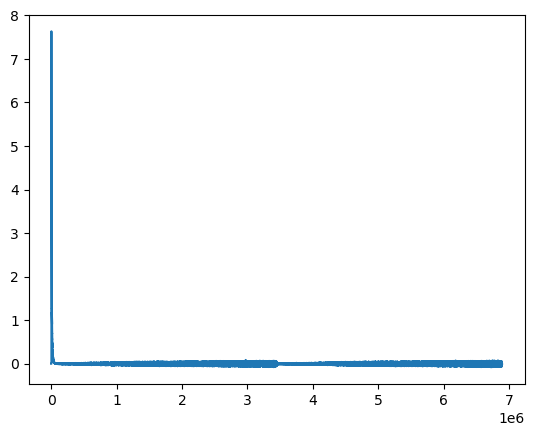

In [32]:
plt.plot(eval_0E['row_index'],eval_0E['Vibration_1'])
plt.show()

In [33]:
# based on the paper, there are 1670 x 1 second datasets or 1670 x 4096 rows = 6,840,320
# We can take out 6,893,567 - 6,840,320 = 53,247 (similar to the training data)

eval_0E_cut = eval_0E.iloc[53247:]
# Creating indexes to index the data for easier comparison across various datasets for ML
my_list = ['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10','S11','S12'
          ,'S13','S14','S15','S16','S17','S18','S19','S20'] # list of labels where S1 to S20 represent second 1 to second 20

interval = 4096
repeated_string_list = np.repeat(my_list, 4096)
repeated_string_list
# Each entity repeats itself for 4096 times

array(['S1', 'S1', 'S1', ..., 'S20', 'S20', 'S20'], dtype='<U3')

In [34]:
print(eval_0E_cut.shape)

df_interval = eval_0E_cut.shape[0]/4096
print(df_interval)

(6840320, 6)
1670.0


In [35]:
eval_0E_cut.describe()

row_index          V_in  Measured_RPM   Vibration_1   Vibration_2  \
count  6.840320e+06  6.840320e+06  6.840320e+06  6.840320e+06  6.840320e+06   
mean   3.473408e+06  6.062275e+00  1.491109e+03  5.809050e-04  6.878826e-04   
std    1.974630e+06  1.205259e+00  2.563701e+02  6.504900e-03  8.170193e-03   
min    5.324800e+04  4.000000e+00  1.025974e+03 -8.161068e-02 -1.398516e-01   
25%    1.763328e+06  5.000000e+00  1.273588e+03 -1.418590e-03 -1.354217e-03   
50%    3.473408e+06  6.100000e+00  1.486911e+03  5.364418e-04  6.031990e-04   
75%    5.183487e+06  7.100000e+00  1.710401e+03  2.685785e-03  2.677441e-03   
max    6.893567e+06  8.100000e+00  1.959616e+03  8.706570e-02  1.345038e-01   

        Vibration_3  
count  6.840320e+06  
mean   3.251960e-03  
std    2.560837e-03  
min   -2.267003e-02  
25%    2.033710e-03  
50%    3.210306e-03  
75%    4.518032e-03  
max    2.895355e-02

In [36]:
pivot = eval_0E_cut.groupby('V_in').size().reset_index(name='Count')
pivot

V_in   Count
0    4.0  122881
1    4.1  163840
2    4.2  163840
3    4.3  163840
4    4.4  163840
5    4.5  163840
6    4.6  163840
7    4.7  163840
8    4.8  163840
9    4.9  163840
10   5.0  163840
11   5.1  163840
12   5.2  163840
13   5.3  163840
14   5.4  163840
15   5.5  163840
16   5.6  163840
17   5.7  163840
18   5.8  163840
19   5.9  163840
20   6.0  163840
21   6.1  163840
22   6.2  163840
23   6.3  163840
24   6.4  163840
25   6.5  163840
26   6.6  163840
27   6.7  163840
28   6.8  163840
29   6.9  163840
30   7.0  163840
31   7.1  163840
32   7.2  163840
33   7.3  163840
34   7.4  163840
35   7.5  163840
36   7.6  163840
37   7.7  163840
38   7.8  163840
39   7.9  163840
40   8.0  163840
41   8.1  163839

In [37]:
eval_0E_cut['Time_Index_Label'] = eval_0E_cut.groupby('V_in').cumcount() // 4096 + 1
eval_0E_cut['Time_Index_Label'] = eval_0E_cut.apply(lambda x: f"{x['V_in']}_{int(x['Time_Index_Label'])}S", axis=1)
eval_0E_cut.head()

C:\Users\jerem\AppData\Local\Temp\ipykernel_27684\2563243942.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eval_0E_cut['Time_Index_Label'] = eval_0E_cut.groupby('V_in').cumcount() // 4096 + 1
C:\Users\jerem\AppData\Local\Temp\ipykernel_27684\2563243942.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eval_0E_cut['Time_Index_Label'] = eval_0E_cut.apply(lambda x: f"{x['V_in']}_{int(x['Time_Index_Label'])}S", axis=1)


row_index  V_in  Measured_RPM  Vibration_1  Vibration_2  Vibration_3  \
53247      53248   4.0     1073.0766     0.014654     0.025413     0.021024   
53248      53249   4.0     1073.0766     0.014468     0.025604     0.021296   
53249      53250   4.0     1073.0766     0.014936     0.025635     0.020736   
53250      53251   4.0     1073.0766     0.014869     0.025729     0.020697   
53251      53252   4.0     1073.0766     0.014682     0.025866     0.020970   

      Time_Index_Label  
53247           4.0_1S  
53248           4.0_1S  
53249           4.0_1S  
53250           4.0_1S  
53251           4.0_1S

In [38]:
eval_0E_cut.tail()

row_index  V_in  Measured_RPM  Vibration_1  Vibration_2  Vibration_3  \
6893562    6893563   8.1     1959.3277     0.000098     0.000602     0.003182   
6893563    6893564   8.1     1959.3277     0.000110     0.000299     0.004029   
6893564    6893565   8.1     1959.3277     0.000626     0.000457     0.003378   
6893565    6893566   8.1     1959.3277     0.001309     0.000594     0.003142   
6893566    6893567   8.1     1959.3277     0.001055     0.000815     0.003359   

        Time_Index_Label  
6893562          8.1_40S  
6893563          8.1_40S  
6893564          8.1_40S  
6893565          8.1_40S  
6893566          8.1_40S

In [39]:
# Add an average measured RPM value for each index

RPM_Average_eval = eval_0E_cut.groupby('Time_Index_Label')['Measured_RPM'].mean()
RPM_Average_eval = RPM_Average_eval.reset_index()
RPM_Average_eval.columns = ['Time_Index_Labels', 'Average_RPM']
RPM_Average_eval['Rounded_Average_RPM'] = RPM_Average_eval['Average_RPM'].round(decimals=-1)
RPM_Average_eval

Time_Index_Labels  Average_RPM  Rounded_Average_RPM
0              4.0_10S  1074.022600               1070.0
1              4.0_11S  1064.707644               1060.0
2              4.0_12S  1031.685700               1030.0
3              4.0_13S  1077.334700               1080.0
4              4.0_14S  1064.669900               1060.0
5              4.0_15S  1077.513700               1080.0
6              4.0_16S  1065.672100               1070.0
7              4.0_17S  1029.928100               1030.0
8              4.0_18S  1074.561200               1070.0
9              4.0_19S  1064.627400               1060.0
10              4.0_1S  1073.076600               1070.0
11             4.0_20S  1029.119900               1030.0
12             4.0_21S  1075.514600               1080.0
13             4.0_22S  1029.963400               1030.0
14             4.0_23S  1074.715200               1070.0
15             4.0_24S  1062.962900               1060.0
16             4.0_25S  1029.159600               1030.0
17             4.0_26S  1076.547000               1080.0
18             4.0_27S  1065.662600               1070.0
19             4.0_28S  1075.640000               1080.0
20             4.0_29S  1064.613200               1060.0
21              4.0_2S  1063.156000               1060.0
22             4.0_30S  1029.305200               1030.0
23             4.0_31S  1049.529100               1050.0
24              4.0_3S  1071.974200               1070.0
25              4.0_4S  1061.486700               1060.0
26              4.0_5S  1025.974300               1030.0
27              4.0_6S  1062.280700               1060.0
28              4.0_7S  1026.962100               1030.0
29              4.0_8S  1072.347800               1070.0
30              4.0_9S  1026.149800               1030.0
31             4.1_10S  1094.688273               1090.0
32             4.1_11S  1084.339224               1080.0
33             4.1_12S  1085.255744               1090.0
34             4.1_13S  1084.206801               1080.0
35             4.1_14S  1084.202722               1080.0
36             4.1_15S  1047.435988               1050.0
37             4.1_16S  1048.204191               1050.0
38             4.1_17S  1047.348977               1050.0
39             4.1_18S  1047.264551               1050.0
40             4.1_19S  1094.566027               1090.0
41              4.1_1S  1084.133543               1080.0
42             4.1_20S  1094.680732               1090.0
43             4.1_21S  1049.540696               1050.0
44             4.1_22S  1097.027828               1100.0
45             4.1_23S  1097.961585               1100.0
46             4.1_24S  1099.948245               1100.0
47             4.1_25S  1098.086601               1100.0
48             4.1_26S  1098.091448               1100.0
49             4.1_27S  1097.058178               1100.0
50             4.1_28S  1099.016648               1100.0
51             4.1_29S  1097.985976               1100.0
52              4.1_2S  1085.128203               1090.0
53             4.1_30S  1097.065121               1100.0
54             4.1_31S  1086.503494               1090.0
55             4.1_32S  1084.839195               1080.0
56             4.1_33S  1085.638872               1090.0
57             4.1_34S  1085.525736               1090.0
58             4.1_35S  1084.854171               1080.0
59             4.1_36S  1086.784253               1090.0
60             4.1_37S  1086.592416               1090.0
61             4.1_38S  1086.656396               1090.0
62             4.1_39S  1086.632584               1090.0
63              4.1_3S  1084.310473               1080.0
64             4.1_40S  1049.727058               1050.0
65              4.1_4S  1047.344441               1050.0
66              4.1_5S  1047.513415               1050.0
67              4.1_6S  1047.165842               1050.0
68              4.1_7S  1045.713292               1050.0
69             

In [40]:
# Define the ranges of interest for the seconds
seconds_ranges = list(range(5, 16)) + list(range(25, 36))

# Create a filter mask based on whether the Corrected_Label ends with any of the specified seconds
filter_mask_eval = RPM_Average_eval['Time_Index_Labels'].str.endswith(tuple(f"_{i}S" for i in seconds_ranges))

# Apply the filter to the DataFrame
filtered_RPM_Average_eval = RPM_Average_eval[filter_mask_eval]
filtered_RPM_Average_eval
filtered_RPM_Average_eval.describe()

Average_RPM  Rounded_Average_RPM
count   920.000000           920.000000
mean   1489.625355          1489.663043
std     255.929232           255.957090
min    1025.974300          1030.000000
25%    1271.470502          1270.000000
50%    1500.771754          1500.000000
75%    1702.700539          1702.500000
max    1938.181799          1940.000000

In [41]:
# Create a list of each rounded_average_RPM per 50 RPM
RPM_check_eval = [i for i in range(1000,1950,50)]
RPM_check_eval

for rpm in RPM_check_eval:
    print(rpm, 'number of indices',len(filtered_RPM_Average_eval[filtered_RPM_Average_eval['Rounded_Average_RPM'] == rpm]))

1000 number of indices 0
1050 number of indices 5
1100 number of indices 9
1150 number of indices 18
1200 number of indices 7
1250 number of indices 15
1300 number of indices 13
1350 number of indices 6
1400 number of indices 18
1450 number of indices 1
1500 number of indices 8
1550 number of indices 14
1600 number of indices 1
1650 number of indices 10
1700 number of indices 15
1750 number of indices 5
1800 number of indices 5
1850 number of indices 13
1900 number of indices 1


### Based on the above 0D, 0E data, we can only evaluate a few RPMs as the evaluation datasets has lesser RPMs
### For the below, let's keep only those between 5S to 15S and 25S to 35S for each V_in interval

In [42]:
filtered_RPM_Average_train

Time_Index_Labels  Average_RPM  Rounded_Average_RPM
0             10.0_10S  2273.869617               2270.0
1             10.0_11S  2278.057258               2280.0
2             10.0_12S  2372.480369               2370.0
3             10.0_13S  2376.441987               2380.0
4             10.0_14S  2345.673289               2350.0
5             10.0_15S  2341.515691               2340.0
16            10.0_25S  2278.187930               2280.0
17            10.0_26S  2376.590723               2380.0
18            10.0_27S  2376.676234               2380.0
19            10.0_28S  2341.189461               2340.0
20            10.0_29S  2341.014210               2340.0
22            10.0_30S  2277.990911               2280.0
23            10.0_31S  2278.058256               2280.0
24            10.0_32S  2376.566070               2380.0
25            10.0_33S  2371.933755               2370.0
26            10.0_34S  2345.948455               2350.0
27            10.0_35S  2341.652658               2340.0
35             10.0_5S  2273.760868               2270.0
36             10.0_6S  2273.655793               2270.0
37             10.0_7S  2372.307685               2370.0
38             10.0_8S  2341.532083               2340.0
39             10.0_9S  2341.447097               2340.0
40            2.05_10S   628.955849                630.0
41            2.05_11S   657.043330                660.0
42            2.05_12S   651.639266                650.0
43            2.05_13S   651.985841                650.0
44            2.05_14S   628.940751                630.0
45            2.05_15S   655.971088                660.0
56            2.05_25S   659.107696                660.0
57            2.05_26S   654.097286                650.0
58            2.05_27S   654.689596                650.0
59            2.05_28S   633.053332                630.0
60            2.05_29S   633.068477                630.0
62            2.05_30S   660.898023                660.0
63            2.05_31S   651.369585                650.0
64            2.05_32S   655.438482                660.0
65            2.05_33S   632.638135                630.0
66            2.05_34S   633.936009                630.0
67            2.05_35S   660.467141                660.0
75             2.05_5S   629.284142                630.0
76             2.05_6S   630.856419                630.0
77             2.05_7S   656.364271                660.0
78             2.05_8S   651.652879                650.0
79             2.05_9S   628.020977                630.0
80             2.0_10S   640.360350                640.0
81             2.0_11S   726.603832                730.0
82             2.0_12S   629.683310                630.0
83             2.0_13S   651.365060                650.0
84             2.0_14S   645.104100                650.0
85             2.0_15S   623.137120                620.0
96             2.0_25S   644.714190                640.0
97             2.0_26S   623.645560                620.0
98             2.0_27S   649.997870                650.0
99             2.0_28S   640.998290                640.0
100            2.0_29S   622.718360                620.0
102            2.0_30S   648.338540                650.0
103            2.0_31S  1061.297865               1060.0
104            2.0_32S   637.833110                640.0
105            2.0_33S   624.588520                620.0
106            2.0_34S   651.925940                650.0
107            2.0_35S   644.927280                640.0
113             2.0_5S   640.124650                640.0
114             2.0_6S   619.003440                620.0
115             2.0_7S   647.067740                650.0
116             2.0_8S   641.728430                640.0
117             2.0_9S   647.296360                650.0
118           2.15_10S   649.906832                650.0
119           2.15_11S   673.542216                670.0
120           2.15_12S   672.583457                670.0
121           2

In [43]:
filter_list_train = filtered_RPM_Average_train['Time_Index_Labels'].tolist()

In [44]:
train_0D_cut_filtered = train_0D_cut[train_0D_cut['Time_Index_Label'].isin(filter_list_train)]
train_0D_cut_filtered.shape

(14508032, 7)

In [45]:
pivot_filter = train_0D_cut_filtered.groupby('V_in').size().reset_index(name='Count')
pivot_filter


V_in  Count
0     2.00  90112
1     2.05  90112
2     2.10  90112
3     2.15  90112
4     2.20  90112
5     2.25  90112
6     2.30  90112
7     2.35  90112
8     2.40  90112
9     2.45  90112
10    2.50  90112
11    2.55  90112
12    2.60  90112
13    2.65  90112
14    2.70  90112
15    2.75  90112
16    2.80  90112
17    2.85  90112
18    2.90  90112
19    2.95  90112
20    3.00  90112
21    3.05  90112
22    3.10  90112
23    3.15  90112
24    3.20  90112
25    3.25  90112
26    3.30  90112
27    3.35  90112
28    3.40  90112
29    3.45  90112
30    3.50  90112
31    3.55  90112
32    3.60  90112
33    3.65  90112
34    3.70  90112
35    3.75  90112
36    3.80  90112
37    3.85  90112
38    3.90  90112
39    3.95  90112
40    4.00  90112
41    4.05  90112
42    4.10  90112
43    4.15  90112
44    4.20  90112
45    4.25  90112
46    4.30  90112
47    4.35  90112
48    4.40  90112
49    4.45  90112
50    4.50  90112
51    4.55  90112
52    4.60  90112
53    4.65  90112
54    4.70  90112
55    4.75  90112
56    4.80  90112
57    4.85  90112
58    4.90  90112
59    4.95  90112
60    5.00  90112
61    5.05  90112
62    5.10  90112
63    5.15  90112
64    5.20  90112
65    5.25  90112
66    5.30  90112
67    5.35  90112
68    5.40  90112
69    5.45  90112
70    5.50  90112
71    5.55  90112
72    5.60  90112
73    5.65  90112
74    5.70  90112
75    5.75  90112
76    5.80  90112
77    5.85  90112
78    5.90  90112
79    5.95  90112
80    6.00  90112
81    6.05  90112
82    6.10  90112
83    6.15  90112
84    6.20  90112
85    6.25  90112
86    6.30  90112
87    6.35  90112
88    6.40  90112
89    6.45  90112
90    6.50  90112
91    6.55  90112
92    6.60  90112
93    6.65  90112
94    6.70  90112
95    6.75  90112
96    6.80  90112
97    6.85  90112
98    6.90  90112
99    6.95  90112
100   7.00  90112
101   7.05  90112
102   7.10  90112
103   7.15  90112
104   7.20  90112
105   7.25  90112
106   7.30  90112
107   7.35  90112
108   7.40  90112
109   7.45  90112
110   7.50  90112
111   7.55  90112
112   7.60  90112
113   7.65  90112
114   7.70  90112
115   7.75  90112
116   7.80  90112
117   7.85  90112
118   7.90  90112
119   7.95  90112
120   8.00  90112
121   8.05  90112
122   8.10  90112
123   8.15  90112
124   8.20  90112
125   8.25  90112
126   8.30  90112
127   8.35  90112
128   8.40  90112
129   8.45  90112
130   8.50  90112
131   8.55  90112
132   8.60  90112
133   8.65  90112
134   8.70  90112
135   8.75  90112
136   8.80  90112
137   8.85  90112
138   8.90  90112
139   8.95  90112
140   9.00  90112
141   9.05  90112
142   9.10  90112
143   9.15  90112
144   9.20  90112
145   9.25  90112
146   9.30  90112
147   9.35  90112
148   9.40  90112
149   9.45  90112
150   9.50  90112
151   9.55  90112
152   9.60  90112
153   9.65  90112
154   9.70  90112
155   9.75  90112
156   9.80  90112
157   9.85  90112
158   9.90  90112
159   9.95  90112
160  10.00  90112

In [46]:
# same for eval_0E

filtered_RPM_Average_eval

Time_Index_Labels  Average_RPM  Rounded_Average_RPM
0              4.0_10S  1074.022600               1070.0
1              4.0_11S  1064.707644               1060.0
2              4.0_12S  1031.685700               1030.0
3              4.0_13S  1077.334700               1080.0
4              4.0_14S  1064.669900               1060.0
5              4.0_15S  1077.513700               1080.0
16             4.0_25S  1029.159600               1030.0
17             4.0_26S  1076.547000               1080.0
18             4.0_27S  1065.662600               1070.0
19             4.0_28S  1075.640000               1080.0
20             4.0_29S  1064.613200               1060.0
22             4.0_30S  1029.305200               1030.0
23             4.0_31S  1049.529100               1050.0
26              4.0_5S  1025.974300               1030.0
27              4.0_6S  1062.280700               1060.0
28              4.0_7S  1026.962100               1030.0
29              4.0_8S  1072.347800               1070.0
30              4.0_9S  1026.149800               1030.0
31             4.1_10S  1094.688273               1090.0
32             4.1_11S  1084.339224               1080.0
33             4.1_12S  1085.255744               1090.0
34             4.1_13S  1084.206801               1080.0
35             4.1_14S  1084.202722               1080.0
36             4.1_15S  1047.435988               1050.0
47             4.1_25S  1098.086601               1100.0
48             4.1_26S  1098.091448               1100.0
49             4.1_27S  1097.058178               1100.0
50             4.1_28S  1099.016648               1100.0
51             4.1_29S  1097.985976               1100.0
53             4.1_30S  1097.065121               1100.0
54             4.1_31S  1086.503494               1090.0
55             4.1_32S  1084.839195               1080.0
56             4.1_33S  1085.638872               1090.0
57             4.1_34S  1085.525736               1090.0
58             4.1_35S  1084.854171               1080.0
66              4.1_5S  1047.513415               1050.0
67              4.1_6S  1047.165842               1050.0
68              4.1_7S  1045.713292               1050.0
69              4.1_8S  1093.593406               1090.0
70              4.1_9S  1093.618562               1090.0
71             4.2_10S  1067.957147               1070.0
72             4.2_11S  1104.187378               1100.0
73             4.2_12S  1115.960932               1120.0
74             4.2_13S  1066.960398               1070.0
75             4.2_14S  1104.215390               1100.0
76             4.2_15S  1106.223292               1110.0
87             4.2_25S  1118.259627               1120.0
88             4.2_26S  1070.878024               1070.0
89             4.2_27S  1106.605665               1110.0
90             4.2_28S  1118.327455               1120.0
91             4.2_29S  1071.050897               1070.0
93             4.2_30S  1071.045781               1070.0
94             4.2_31S  1108.644804               1110.0
95             4.2_32S  1118.478544               1120.0
96             4.2_33S  1071.164986               1070.0
97             4.2_34S  1107.555600               1110.0
98             4.2_35S  1119.417401               1120.0
106             4.2_5S  1066.856587               1070.0
107             4.2_6S  1067.629207               1070.0
108             4.2_7S  1103.288848               1100.0
109             4.2_8S  1114.940072               1110.0
110             4.2_9S  1067.734552               1070.0
111            4.3_10S  1138.090831               1140.0
112            4.3_11S  1127.153053               1130.0
113            4.3_12S  1087.249215               1090.0
114            4.3_13S  1136.038807               1140.0
115            4.3_14S  1127.047365               1130.0
116            4.3_15S  1088.010699               1090.0
127            4.3_25S  1128.394106               1130.0
128            

In [47]:
filter_list_eval = filtered_RPM_Average_eval['Time_Index_Labels'].tolist()
eval_0E_cut_filtered = eval_0E_cut[eval_0E_cut['Time_Index_Label'].isin(filter_list_eval)]
eval_0E_cut_filtered.shape

(3764225, 7)

In [48]:
pivot_eval = eval_0E_cut_filtered.groupby('V_in').size().reset_index(name='Count')
pivot_eval

V_in  Count
0    4.0  69633
1    4.1  90112
2    4.2  90112
3    4.3  90112
4    4.4  90112
5    4.5  90112
6    4.6  90112
7    4.7  90112
8    4.8  90112
9    4.9  90112
10   5.0  90112
11   5.1  90112
12   5.2  90112
13   5.3  90112
14   5.4  90112
15   5.5  90112
16   5.6  90112
17   5.7  90112
18   5.8  90112
19   5.9  90112
20   6.0  90112
21   6.1  90112
22   6.2  90112
23   6.3  90112
24   6.4  90112
25   6.5  90112
26   6.6  90112
27   6.7  90112
28   6.8  90112
29   6.9  90112
30   7.0  90112
31   7.1  90112
32   7.2  90112
33   7.3  90112
34   7.4  90112
35   7.5  90112
36   7.6  90112
37   7.7  90112
38   7.8  90112
39   7.9  90112
40   8.0  90112
41   8.1  90112

### Save as a new csv file

In [49]:
train_0D_cut_filtered.to_csv('train_0D_cleaned.csv')
eval_0E_cut_filtered.to_csv('eval_0E_cleaned.csv')